In [6]:
import numpy as np
import tensorflow as tf


from ForwardBackward import FB_splitting, Objective, GradObjective
from Problems import *
from utils import plot_objective, plot_objective_and_derivative

In [25]:
problem = generate_problem(1, 2)
M = problem.M
y = problem.y
x = problem.sp1
tau = 0.124
stepsize = 0.02

objective = Objective(M, x, y, tau)

#Generate Samples
num_samples = 100
samples = np.random.rand(num_samples, 2) * 2 - 1


#Generate Steps
fb = FB_splitting(M,y,x,tau)
solution, steps = fb.solve(1000)


#plot_objective(samples, steps, M, y, tau).show()
objective = Objective(M, solution, y, tau)
x


array([ 1.64324072, -8.11742716])

In [30]:
import numpy as np
import plotly.graph_objects as go

# Define the objective function
def objective_function(M, x, y, tau):
    return (0.5 * np.linalg.norm(np.matmul(M, x) - y)) + (tau * np.linalg.norm(x, ord=1))

# Define the gradient of the objective function
def gradient(M, x, y, tau):
    grad_first_part = M.T @ (np.matmul(M, x) - y) / np.linalg.norm(np.matmul(M, x) - y)
    grad_second_part = tau * np.sign(x)
    grad_first_part = (5*M * np.abs())/(np.sqrt(np.abs(np.matmul(M, x) - y)**2 + 4))
    grad_second_part = 
    gradient = 
    return grad_first_part + grad_second_part

# Create a grid of x values for visualization
x1_vals = np.linspace(-10, 10, 50)
x2_vals = np.linspace(-10, 10, 50)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)
x_grid = np.vstack((x1_grid.flatten(), x2_grid.flatten()))

# Evaluate the objective function on the grid
#M = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])  # Replace with your M values
#y = np.array([1, 2])  # Replace with your y values
#tau = 1  # Replace with your tau value
z_grid = np.array([objective_function(M, x, y, tau) for x in x_grid.T]).reshape(x1_grid.shape)

# Evaluate the gradient on the grid
gradient_grid = np.array([gradient(M, x, y, tau) for x in x_grid.T]).reshape(x1_grid.shape + (2,))

# Create the 3D surface plot
surface = go.Surface(x=x1_grid, y=x2_grid, z=z_grid, colorscale='Viridis')

# Create the gradient arrows
x1_arrows = x1_grid[::5, ::5]
x2_arrows = x2_grid[::5, ::5]
grad_x1 = gradient_grid[::5, ::5, 0]
grad_x2 = gradient_grid[::5, ::5, 1]

# Scale the gradient vectors for visualization
scale_factor = 1.0
grad_x1_scaled = grad_x1 * scale_factor
grad_x2_scaled = grad_x2 * scale_factor

# Create the arrow traces
arrows = go.Scatter3d(x=[], y=[], z=[], mode='lines', line=dict(color='red', width=5), hoverinfo='none')
for i in range(x1_arrows.shape[0]):
    for j in range(x1_arrows.shape[1]):
        x_start = x1_arrows[i, j]
        y_start = x2_arrows[i, j]
        z_start = z_grid[::5, ::5][i, j]
        x_end = x_start + grad_x1_scaled[i, j]
        y_end = y_start + grad_x2_scaled[i, j]
        z_end = z_start
        arrows['x'] += tuple([x_start, x_end, None])
        arrows['y'] += tuple([y_start, y_end, None])
        arrows['z'] += tuple([z_start, z_end, None])

# Create the figure and add the surface and arrows
fig = go.Figure(data=[surface, arrows])

# Set the title and axis labels
fig.update_layout(title='Objective Function and Gradient Visualization',
                  scene=dict(xaxis_title='X1', yaxis_title='X2', zaxis_title='Objective Value'), height= 1000)

# Show the plot
fig.show()


[ 1.72955105 -1.60198789]


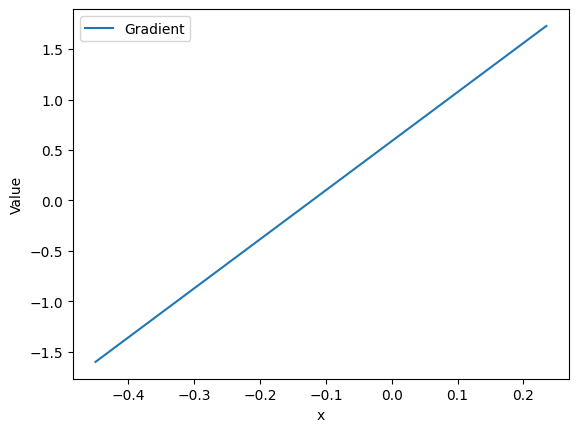

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def gradient(x, M, y, tau):
  """Computes the gradient of the given term.

  Args:
    x: A numpy array of shape (4,).
    M: A numpy array of shape (2, 4).
    y: A numpy array of shape (2,).
    tau: A positive scalar.

  Returns:
    A numpy array of shape (4,).
  """

  grad_x1 = tau * (1 / np.linalg.norm(x, ord=1)) * np.sign(x)
  grad_x2 = 0.5 * M.T @ (np.matmul(M, x) - y) / np.linalg.norm(np.matmul(M, x) - y)
  grad_x = grad_x1 + grad_x2
  return grad_x

def plot_gradient(x, M, y, tau):
  """Plots the gradient and the original function.

  Args:
    x: A numpy array of shape (4,).
    M: A numpy array of shape (2, 4).
    y: A numpy array of shape (2,).
    tau: A positive scalar.
  """

  grad_x = gradient(x, M, y, tau)
  f = (0.5 * np.linalg.norm(np.matmul(M, x) - y)) + (tau * np.linalg.norm(x, ord=1))
  print(grad_x)
  #plt.plot(x, f, label="Original function")
  plt.plot(x, grad_x, label="Gradient")
  plt.xlabel("x")
  plt.ylabel("Value")
  plt.legend()
  plt.show()


x = np.random.randn(2)
M = np.random.randn(1, 2)
y = np.random.randn(1)
tau = 1.0
plot_gradient(x, M, y, tau)

In [33]:
f

NameError: name 'f' is not defined